# LDA

## 1. 데이터 불러오기
- korean food 키워드가 들어간 뉴스 헤드라인 200개 추출 및 요약

In [ ]:
import pandas as pd
data = pd.read_csv('/content/koreanwave0.csv', encoding='euc-kr')

In [ ]:
print(data.head(5))

   publish_date                                      headline_text
0           NaN  New K-dramas to tune on Netflix this October 2...
1           NaN  Korean Film and Tourism Festival 2021 held in ...
2           NaN  3 new K-dramas to watch this December  Telanga...
3           NaN  Are K-pop and K-dramas spurring the popularity...
4           NaN  10 Netflix Originals of 2021 that will never b...


In [ ]:
text = data[['headline_text']]
text.head(5)

,headline_text
0,New K-dramas to tune on Netflix this October 2...
1,Korean Film and Tourism Festival 2021 held in ...
2,3 new K-dramas to watch this December Telanga...
3,Are K-pop and K-dramas spurring the popularity...
4,10 Netflix Originals of 2021 that will never b...


## 2. 전처리

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(text.head(5))

                                       headline_text
0  [New, K-dramas, to, tune, on, Netflix, this, O...
1  [Korean, Film, and, Tourism, Festival, 2021, h...
2  [3, new, K-dramas, to, watch, this, December, ...
3  [Are, K-pop, and, K-dramas, spurring, the, pop...
4  [10, Netflix, Originals, of, 2021, that, will,...


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(text.head(5))

                                       headline_text
0  [New, K-dramas, tune, Netflix, October, 2021, ...
1  [Korean, Film, Tourism, Festival, 2021, held, ...
2  [3, new, K-dramas, watch, December, Telangana,...
3  [Are, K-pop, K-dramas, spurring, popularity, n...
4  [10, Netflix, Originals, 2021, never, forgotte...


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
                                       headline_text
0  [New, K-dramas, tune, Netflix, October, 2021, ...
1  [Korean, Film, Tourism, Festival, 2021, hold, ...
2  [3, new, K-dramas, watch, December, Telangana,...
3  [Are, K-pop, K-dramas, spur, popularity, nativ...
4  [10, Netflix, Originals, 2021, never, forget, ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

0    [K-dramas, tune, Netflix, October, 2021, Lifes...
1    [Korean, Film, Tourism, Festival, 2021, hold, ...
2        [K-dramas, watch, December, Telangana, Today]
3    [K-pop, K-dramas, spur, popularity, native, in...
4    [Netflix, Originals, 2021, never, forget, Spor...
Name: headline_text, dtype: object


## 3. TF-IDF 행렬 만들기

In [ ]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc # 다시 text['headline_text']에 재저장

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
text['headline_text'][:5]

0    K-dramas tune Netflix October 2021 Lifestyle Asia
1    Korean Film Tourism Festival 2021 hold Dhaka D...
2              K-dramas watch December Telangana Today
3    K-pop K-dramas spur popularity native ingredie...
4      Netflix Originals 2021 never forget Sportskeeda
Name: headline_text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(text['headline_text'])
X.shape # TF-IDF 행렬의 크기 확인

(166, 625)

## 4. 토픽 모델링

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=5)

In [ ]:
lda_top=lda_model.fit_transform(X)

In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.42946238 0.26038718 0.29440937 ... 0.27690846 0.27063825 0.43356515]
 [0.26721007 0.27742321 1.39835166 ... 0.27673867 0.31359611 0.27976634]
 [0.26656753 0.24603434 0.29500285 ... 0.26214083 0.30220169 0.27610103]
 ...
 [0.27776471 0.42718229 0.31152279 ... 1.56534046 0.2768865  0.26262216]
 [0.29266933 0.27474933 0.33257556 ... 0.32694068 0.28901156 0.26356824]
 [0.28941877 0.24292388 1.91219355 ... 0.2633021  0.28526724 0.29677353]]
(10, 625)


In [ ]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('task', 0.68), ('meat', 0.67), ('south', 0.66), ('force', 0.66), ('study', 0.53)]
Topic 2: [('com', 2.76), ('dramas', 2.71), ('korean', 2.33), ('idiva', 1.85), ('indian', 1.65)]
Topic 3: [('korean', 3.02), ('india', 2.8), ('drama', 2.75), ('food', 2.16), ('news', 2.14)]
Topic 4: [('delivered', 1.34), ('livemint', 1.29), ('love', 1.25), ('smacking', 1.22), ('food', 1.22)]
Topic 5: [('dramas', 1.37), ('role', 1.32), ('strongest', 1.3), ('rappler', 1.3), ('ramyun', 1.3)]
Topic 6: [('korean', 0.56), ('lingo', 0.55), ('crazy', 0.54), ('dash', 0.54), ('sudden', 0.53)]
Topic 7: [('com', 2.13), ('drama', 1.4), ('favorite', 1.2), ('dramas', 1.17), ('inspired', 1.15)]
Topic 8: [('game', 2.68), ('squid', 2.25), ('guardian', 2.01), ('york', 1.57), ('travel', 1.53)]
Topic 9: [('express', 1.39), ('indian', 1.28), ('kimchi', 1.25), ('dictionary', 1.22), ('word', 1.2)]
Topic 10: [('best', 2.23), ('2021', 1.91), ('dramas', 1.61), ('netflix', 1.45), ('parade', 1.3)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 토픽 10개 중 4개가 한류 관련 토픽

## 5. 시각화

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1])

[(0, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [ ]:
import gensim
NUM_TOPICS = 10 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.047*"Korean" + 0.017*"K-drama" + 0.013*"News" + 0.013*"Times"')
(1, '0.029*"Korean" + 0.020*"Times" + 0.019*"India" + 0.015*"food"')
(2, '0.047*"Korean" + 0.016*"Times" + 0.011*"K-Drama" + 0.011*"K-Dramas"')
(3, '0.030*"India" + 0.030*"Korean" + 0.023*"K-drama" + 0.008*"K-dramas"')
(4, '0.038*"Korean" + 0.022*"Food" + 0.017*"News" + 0.011*"popularity"')
(5, '0.029*"Korean" + 0.027*"Asia" + 0.025*"Korea" + 0.025*"Netflix"')
(6, '0.040*"Korean" + 0.014*"Food" + 0.014*"Home" + 0.014*"Make"')
(7, '0.020*"Korean" + 0.020*"Philippines" + 0.020*"Cosmopolitan" + 0.015*"K-Dramas"')
(8, '0.027*"Korean" + 0.022*"food" + 0.022*"What" + 0.016*"Netflix"')
(9, '0.033*"Korean" + 0.023*"Squid" + 0.023*"Game" + 0.017*"Netflix"')


In [ ]:
print(dictionary[66])

Favorite


In [ ]:
len(dictionary)

743

In [ ]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.021*"Kimchi" + 0.021*"name" + 0.021*"wave" + 0.021*"Culture"')
(1, '0.048*"Korean" + 0.039*"food" + 0.029*"India" + 0.020*"Times"')
(2, '0.028*"food" + 0.028*"2021" + 0.014*"growth" + 0.014*"despite"')
(3, '0.026*"Korean" + 0.026*"Ramen" + 0.026*"favourite" + 0.026*"PINKVILLA"')
(4, '0.044*"Korean" + 0.022*"India" + 0.022*"South" + 0.022*"K-drama"')
(5, '0.047*"Korean" + 0.020*"K-Drama" + 0.020*"South" + 0.015*"Times"')
(6, '0.019*"Displeases" + 0.019*"Observer" + 0.019*"Connecting" + 0.019*"people"')
(7, '0.055*"Korean" + 0.022*"News" + 0.022*"Daily" + 0.022*"Minnesota"')
(8, '0.044*"Netflix" + 0.038*"Korean" + 0.035*"Game" + 0.035*"Squid"')
(9, '0.099*"Lifestyle" + 0.096*"Asia" + 0.087*"2021" + 0.086*"Netflix"')
(10, '0.042*"Korean" + 0.025*"Times" + 0.017*"Netflix" + 0.017*"Food"')
(11, '0.034*"Korea" + 0.017*"Herald" + 0.017*"criticism" + 0.017*"Times"')
(12, '0.001*"People" + 0.001*"catch-up" + 0.001*"music" + 0.001*"magic"')
(13, '0.043*"Korean" + 0.026*"K-drama" + 0.018*"

In [ ]:
print(ldamodel.print_topics())

[(0, '0.021*"Culture" + 0.021*"chapter" + 0.021*"epicenter" + 0.021*"name" + 0.021*"Kimchi" + 0.021*"wave" + 0.021*"Korean" + 0.021*"cultural" + 0.021*"Indian" + 0.021*"Travel"'), (1, '0.048*"Korean" + 0.039*"food" + 0.029*"India" + 0.020*"Times" + 0.019*"binge" + 0.019*"comfort" + 0.010*"concert" + 0.010*"Arirang" + 0.010*"boxscore" + 0.010*"biggest"'), (2, '0.028*"food" + 0.028*"2021" + 0.014*"pandemic" + 0.014*"record" + 0.014*"ZAWYA" + 0.014*"despite" + 0.014*"growth" + 0.014*"COVID-19" + 0.014*"K-Food" + 0.014*"strong"'), (3, '0.026*"Korean" + 0.026*"favourite" + 0.026*"PINKVILLA" + 0.026*"Ramen" + 0.013*"Boar" + 0.013*"Should" + 0.013*"Recipe" + 0.013*"Stream" + 0.013*"Inspired" + 0.013*"Easy"'), (4, '0.044*"Korean" + 0.022*"India" + 0.022*"K-drama" + 0.022*"South" + 0.022*"October" + 0.015*"culture" + 0.015*"Hometown" + 0.015*"Detroit" + 0.015*"Cha-Cha-Cha" + 0.015*"Telegraph"'), (5, '0.047*"Korean" + 0.020*"K-Drama" + 0.020*"South" + 0.015*"Times" + 0.015*"Food" + 0.015*"K-dram

In [ ]:
!pip install --upgrade pip
!pip install --upgrade jupyter notebook
!pip install pyLDAvis

In [ ]:
!pip install pyLDAvis===2.1.2

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(4, 0.2612518), (9, 0.62624824)]
1 번째 문서의 topic 비율은 [(15, 0.90500003)]
2 번째 문서의 topic 비율은 [(13, 0.8416667)]
3 번째 문서의 topic 비율은 [(5, 0.95476186)]
4 번째 문서의 topic 비율은 [(17, 0.86428577)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,9.0,0.6262,"[(4, 0.261252), (9, 0.62624806)]"
1,1,15.0,0.9050,"[(15, 0.90500003)]"
2,2,13.0,0.8417,"[(13, 0.8416667)]"
3,3,5.0,0.9548,"[(5, 0.95476186)]"
4,4,17.0,0.8643,"[(17, 0.86428577)]"
5,5,15.0,0.9136,"[(15, 0.9136364)]"
6,6,18.0,0.8417,"[(18, 0.8416667)]"
7,7,14.0,0.9136,"[(14, 0.9136364)]"
8,8,15.0,0.8100,"[(15, 0.81000006)]"
9,9,17.0,0.8417,"[(17, 0.8416667)]"


## 워드클라우드(빈도)

In [ ]:
documents = text['headline_text']

In [ ]:
documents

0      K-dramas tune Netflix October 2021 Lifestyle Asia
1      Korean Film Tourism Festival 2021 hold Dhaka D...
2                K-dramas watch December Telangana Today
3      K-pop K-dramas spur popularity native ingredie...
4        Netflix Originals 2021 never forget Sportskeeda
                             ...                        
161    Kimchi Chinese name become epicenter cultural ...
162    Brake Korean corn chicken Boonseek destination...
163    South Korea famous BB.Q Chicken finally come S...
164        Best Korean Dramas KDramas Stream 2021 Parade
165                     journey Korean food Jordan Times
Name: headline_text, Length: 166, dtype: object

In [ ]:
title = "".join(documents)

filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

filtered_title

'K-dramas tune Netflix October 2021 Lifestyle AsiaKorean Film Tourism Festival 2021 hold Dhaka Daily StarK-dramas watch December Telangana TodayK-pop K-dramas spur popularity native ingredients Japanese produce common fine restaurants Korea offer good Michelin-starred chefs South China Morning PostNetflix Originals 2021 never forget SportskeedaKorea promote tourism movies food K-pop Travel Manorama English OnmanoramaChili Sauce Uses Recipes GreatistMost Exotic Korean Foods next trip Korea Town Travel Newsdegree Korean Experience Daijiworld comFavorite K-Drama Neighborhoods Cosmopolitan PhilippinesMeet Santa Alicia Keys perform watch critically acclaim film Your December highlight Expo 2020 Dubai Gulf NewsKolkata slowly fulfil grow demand Korean cuisine Telegraph IndiaBest Shows Netflix Watch December 2021 Good Series Watch Real Simplescore biggest boxscore almost decade four-night concert Billboard Arirang NewsFrom  Spider-Man Home  Matrix movies gear cinema release December Korea Time

In [ ]:
!pip install wordcloud
!pip install matplotlib

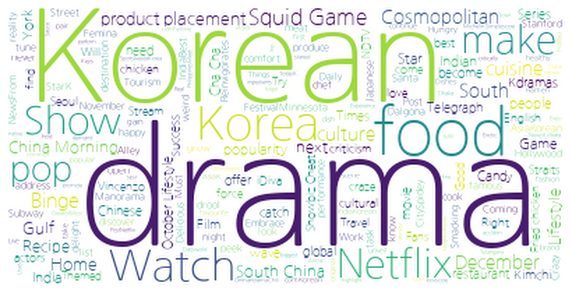

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 

wordcloud = WordCloud(font_path='/content/NanumGothicLight.ttf', background_color='white').generate(filtered_title)


plt.figure(figsize=(10,10)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 


## 워드클라우드(lda)

Dictionary(743 unique tokens: ['2021', 'Asia', 'K-dramas', 'Lifestyle', 'Netflix']...)
corpus : [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(0, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(2, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(2, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(0, 1), (4, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(21, 1), (22, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(11, 1), (22, 1), (45, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(11, 1), (62, 1), (63, 1), (64, 1)], [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1)], [(15, 1), (18, 1), (58, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(11, 1), (84,

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

(0, '0.037*"Korean" + 0.013*"Netflix" + 0.011*"Times" + 0.011*"Korea" + 0.011*"2021" + 0.009*"K-drama" + 0.009*"South" + 0.008*"food" + 0.008*"Game" + 0.007*"India"')
(1, '0.031*"Korean" + 0.012*"K-dramas" + 0.010*"Times" + 0.010*"News" + 0.010*"South" + 0.009*"food" + 0.008*"Asia" + 0.008*"Food" + 0.008*"Lifestyle" + 0.007*"Korea"')


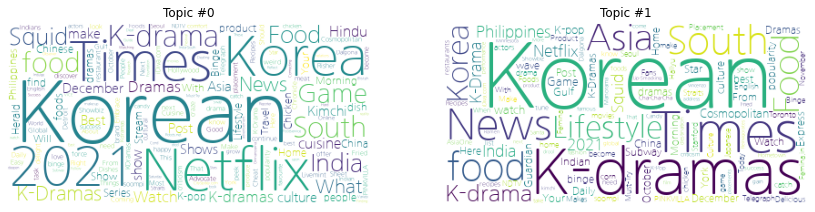

In [ ]:
from gensim import corpora 
from gensim import models


stoplist = ('.!?')                                        # 불용어 처리
texts = [[word for word in document.split() if word not in stoplist]
        for document in documents]

dictionary = corpora.Dictionary(texts)                    # 사전 생성 (토큰화)
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)
print('corpus : {}'.format(corpus))

#-----------------------------------------------------------------

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=2, random_state = 1)                   # 모델구축

for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
	print(t)
 
wc = WordCloud(background_color='white',
                font_path='/content/NanumGothicLight.ttf')            # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud.png', bbox_inches='tight')     # 이미지 저장